# Project on Exploratory Data Analysis ( Most Streamed Spotify Songs 2023 )
####  (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023).


#### Importing the Libraries that will be used for the Said Project


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the File Obtained from Kaggle

In [31]:
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [32]:
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

## Overview of Dataset

#### Getting the Number of Rows and Columns

In [13]:
columns, rows = df.shape
print('The Number of Columns: ', str(columns))
print('The Number of Rows: ', str(rows))


The Number of Columns:  953
The Number of Rows:  24


#### Getting all the Dtypes and Missing Values

In [33]:
data= pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
data.columns = ['Column Name', 'Data Type']

missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column Name', 'Missing Count']

summary_1= data.merge(missing_values)
summary_1

,Column Name,Data Type,Missing Count
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


## Basic Descriptive Statistics

#### Getting the Mean, Median, and Standard Deviation of the Streams Column

In [35]:
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

summary_2 = pd.DataFrame({'Variable': ['Mean', 'Median', 'Standard Deviation'],'Value': [df['streams'].mean(), df['streams'].median(), df['streams'].std()]})
summary_2


,Variable,Value
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08


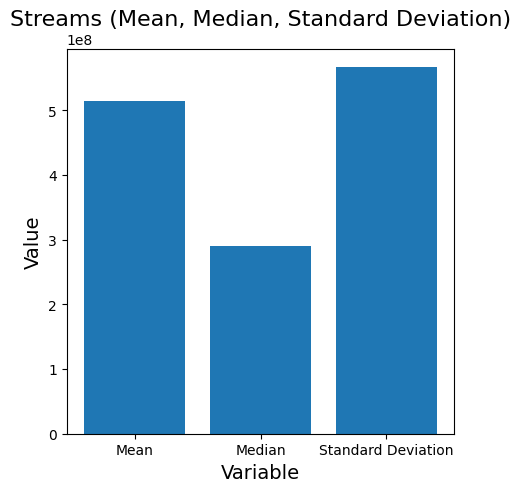

In [36]:
plt.figure(figsize=(5, 5))

plt.bar(summary_2['Variable'], summary_2['Value'])

plt.title('Streams (Mean, Median, Standard Deviation)', fontsize = 16)
plt.xlabel('Variable', fontsize = 14)
plt.ylabel('Value', fontsize = 14)

plt.show()

#### What is the distribution of released_year and artist_count

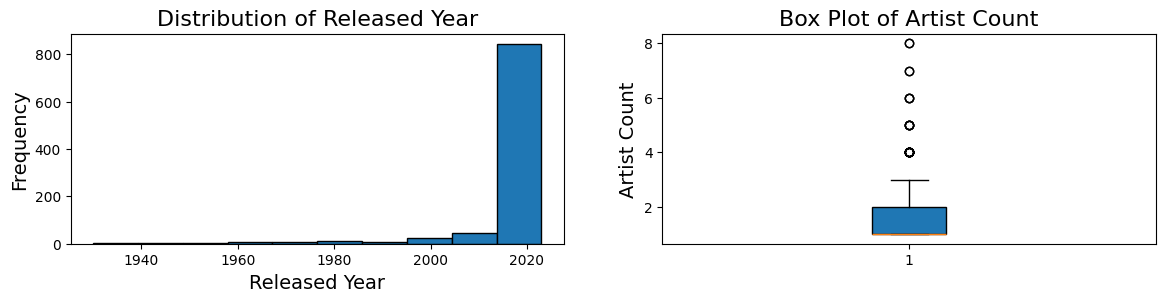

In [22]:
plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
plt.hist(df['released_year'], edgecolor='black')
plt.title('Distribution of Released Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.subplot(2, 2, 2)
plt.boxplot(df['artist_count'], vert=True, patch_artist=True)
plt.title('Box Plot of Artist Count', fontsize=16)
plt.ylabel('Artist Count', fontsize=14)

plt.show()

#### Determining The Outliers

In [83]:
Q1 = df['artist_count'].quantile(0.25)
Q3 = df['artist_count'].quantile(0.75)
iden = Q3 - Q1

low = Q1-1.5*iden
up = Q3+1.5*iden 
outliers = df[(df['artist_count'] < low) | (df['artist_count'] > up)]

summary_3 = outliers[['track_name', 'artist(s)_name', 'artist_count']].sort_values('artist_count').reset_index(drop=True)
summary_3

,track_name,artist(s)_name,artist_count
0,Tubarï¿½ï¿½o Te,"Dj LK da Escï¿½ï¿½cia, Tchakabum, mc jhenny, M",4
1,La Llevo Al Cielo (Ft. ï¿½ï¿½engo F,"Nengo Flow, Anuel Aa, Chris Jedi, Chencho Corl...",4
2,Cash In Cash Out,"Pharrell Williams, Tyler, The Creator, 21 Savage",4
3,sentaDONA (Remix) s2,"Luï¿½ï¿½sa Sonza, MC Frog, Dj Gabriel do Borel...",4
4,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine",4
5,OUT OUT (feat. Charli XCX & Saweetie),"Charli XCX, Jax Jones, Joel Corry, Saweetie",4
6,Entre Nosotros (Remix) [con Nicki Nicole],"Lit Killah, Maria Becerra, Tiago pzk, NICKI NI...",4
7,"Stay With Me (with Justin Timberlake, Halsey, ...","Calvin Harris, Halsey, Pharrell Williams, Just...",4
8,Happy Xmas (War Is Over),"John Lennon, The Harlem Community Choir, The P...",4
9,BABY OTAKU,"Fran C, Polima WestCoast, Nickoog Clk, Pablito...",4


## Top Performers

#### Top 5 Most Streamed

In [97]:
top = df[['track_name', 'artist(s)_name', 'streams']].sort_values('streams', ascending=False).head().reset_index(drop=True)
top



,track_name,artist(s)_name,streams
0,Blinding Lights,The Weeknd,3.703895e+09
1,Shape of You,Ed Sheeran,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2.887242e+09
3,Dance Monkey,Tones and I,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


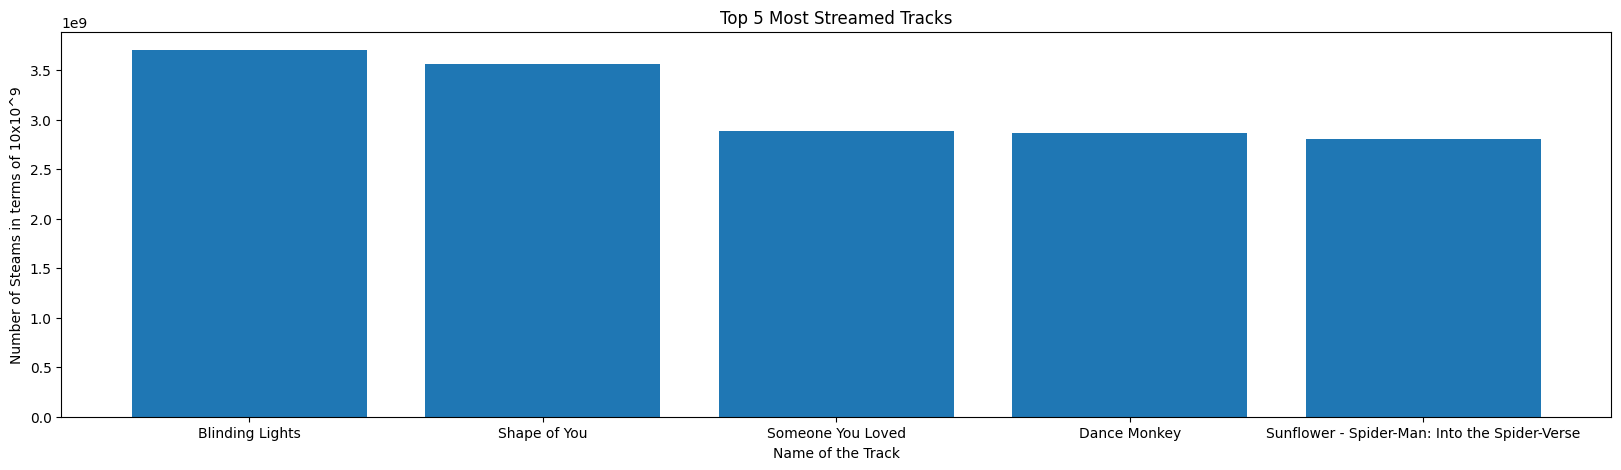

In [129]:
plt.figure(figsize=(20, 5))
plt.bar(top_streamed_summary['track_name'], top_streamed_summary['streams'])

plt.xlabel('Name of the Track')
plt.ylabel('Number of Steams in terms of 10x10^9')
plt.title('Top 5 Most Streamed Tracks')

plt.show()

#### Top 5 most frequent Artists based on the Number of Tracks

In [116]:
Tartist = df['artist(s)_name'].value_counts().head().reset_index()
Tartist.columns = ['artist(s)_name', 'track_count']
Tartist


,artist(s)_name,track_count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


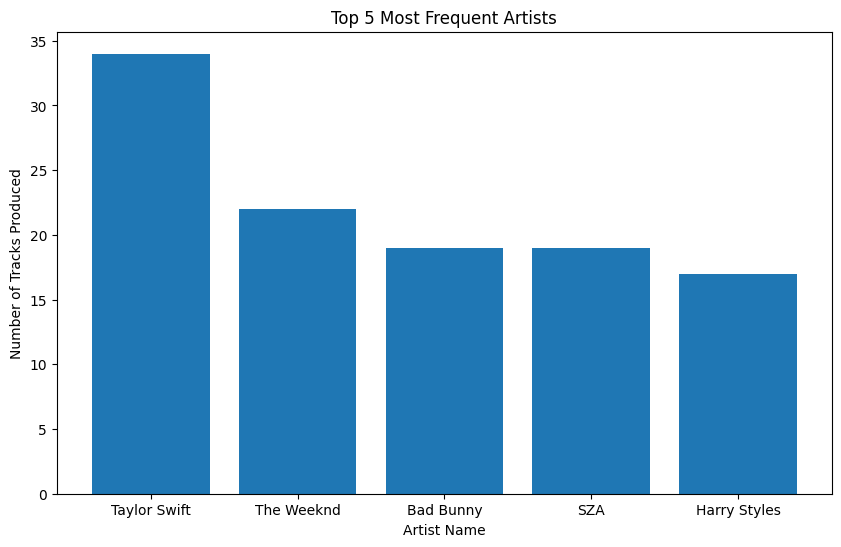

In [130]:
plt.figure(figsize=(10, 6))
plt.bar(Tartist['artist(s)_name'], Tartist['track_count'])

plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks Produced')
plt.title('Top 5 Most Frequent Artists')

plt.show()

## Temporal Trends

#### Trends in the Number of Tracks Released Over Time.

In [149]:
track= df['released_year'].value_counts().sort_index().reset_index()
track.columns = ['released_year', 'track_count']
track.set_index('released_year')

,track_count
released_year,
1930,1
1942,1
1946,1
1950,1
1952,1
1957,2
1958,3
1959,2
1963,3


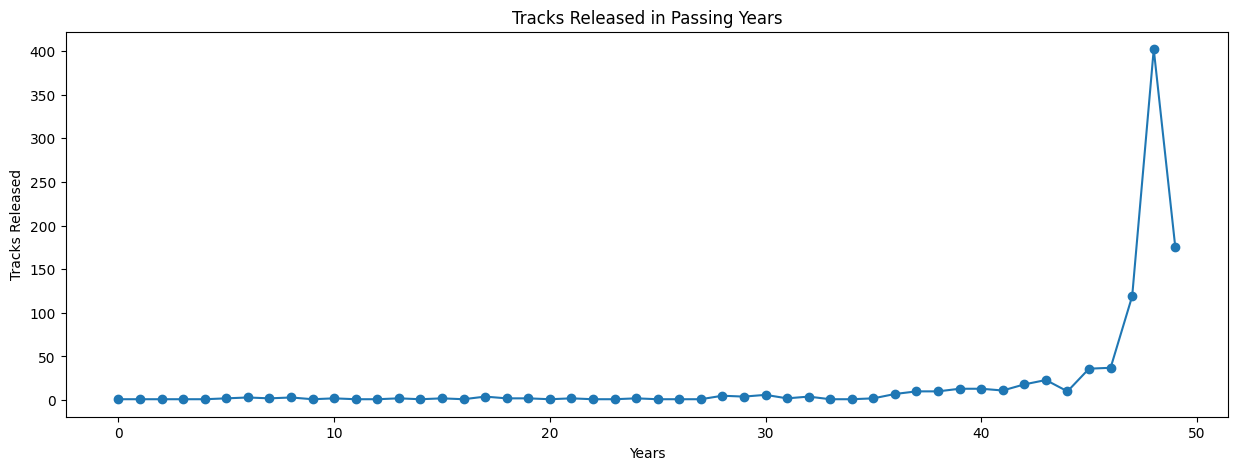

In [166]:
plt.figure(figsize=(15, 5))
plt.plot(track.index, track['track_count'], marker='o')
plt.xlabel('Years')
plt.ylabel('Tracks Released')
plt.title('Tracks Released in Passing Years')
plt.show()

#### Number of Tracks Released per Month

In [188]:
df.groupby("released_month")["released_month"].count()


released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: released_month, dtype: int64

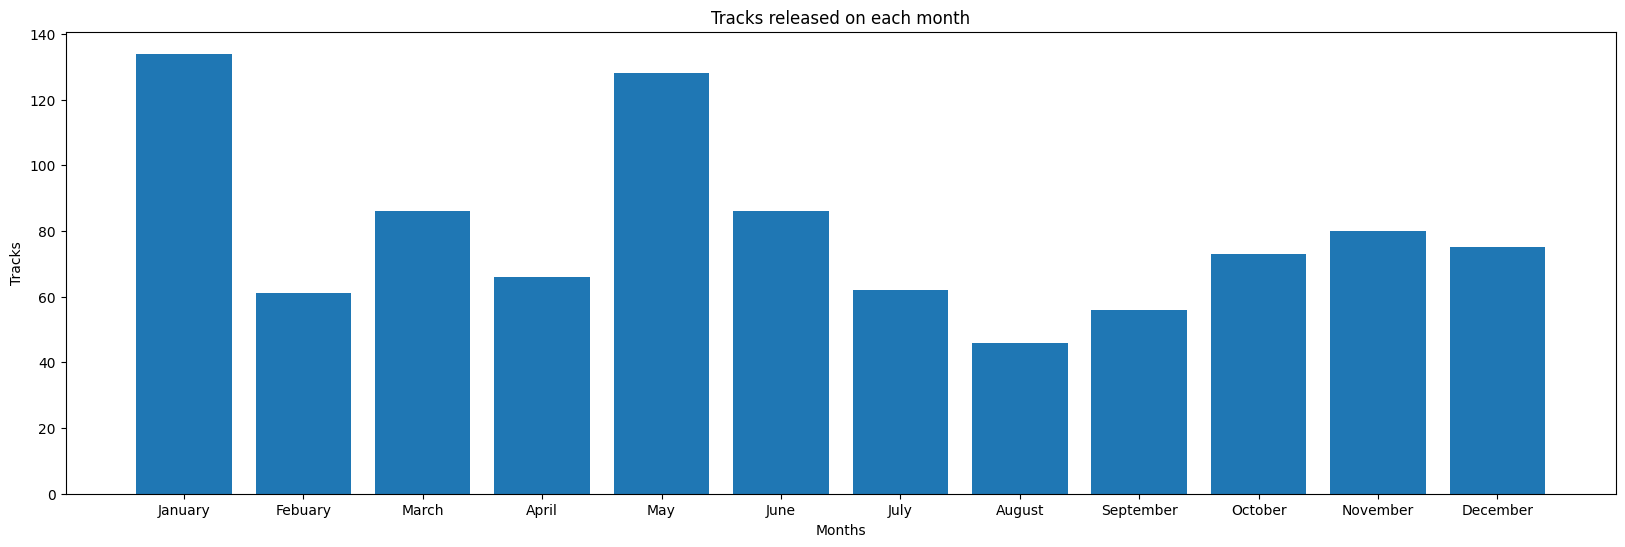

In [208]:
months = ["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October","November","December"]
x = pd.Series(months)
y = df.groupby("released_month")["released_month"].count().tolist()

plt.figure(figsize=(20, 6))
plt.bar(x,y)
plt.xlabel('Months')
plt.ylabel('Tracks')
plt.title('Tracks released on each month')
plt.show()

## Genre and Music Characteristics

#### Correlation between Streams and Musical attributes

In [257]:
M_at = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']
for ats in M_at:
    df[ats] = pd.to_numeric(df[ats], errors='coerce')
    
cor_res = {}

for ats in M_at[:-1]: 
    cor_res[ats + ' vs Streams'] = df[ats].corr(df['streams'])
    
cor_d = pd.DataFrame(cor_res.items(), columns=['Attribute', 'Correlation Coefficient'])
cor_d

,Attribute,Correlation Coefficient
0,bpm vs Streams,-0.002438
1,key vs Streams,0.007695
2,mode vs Streams,0.042635
3,danceability_% vs Streams,-0.105457
4,valence_% vs Streams,-0.040831
5,energy_% vs Streams,-0.026051
6,acousticness_% vs Streams,-0.004485
7,instrumentalness_% vs Streams,-0.044902
8,liveness_% vs Streams,-0.048337
9,speechiness_% vs Streams,-0.112333


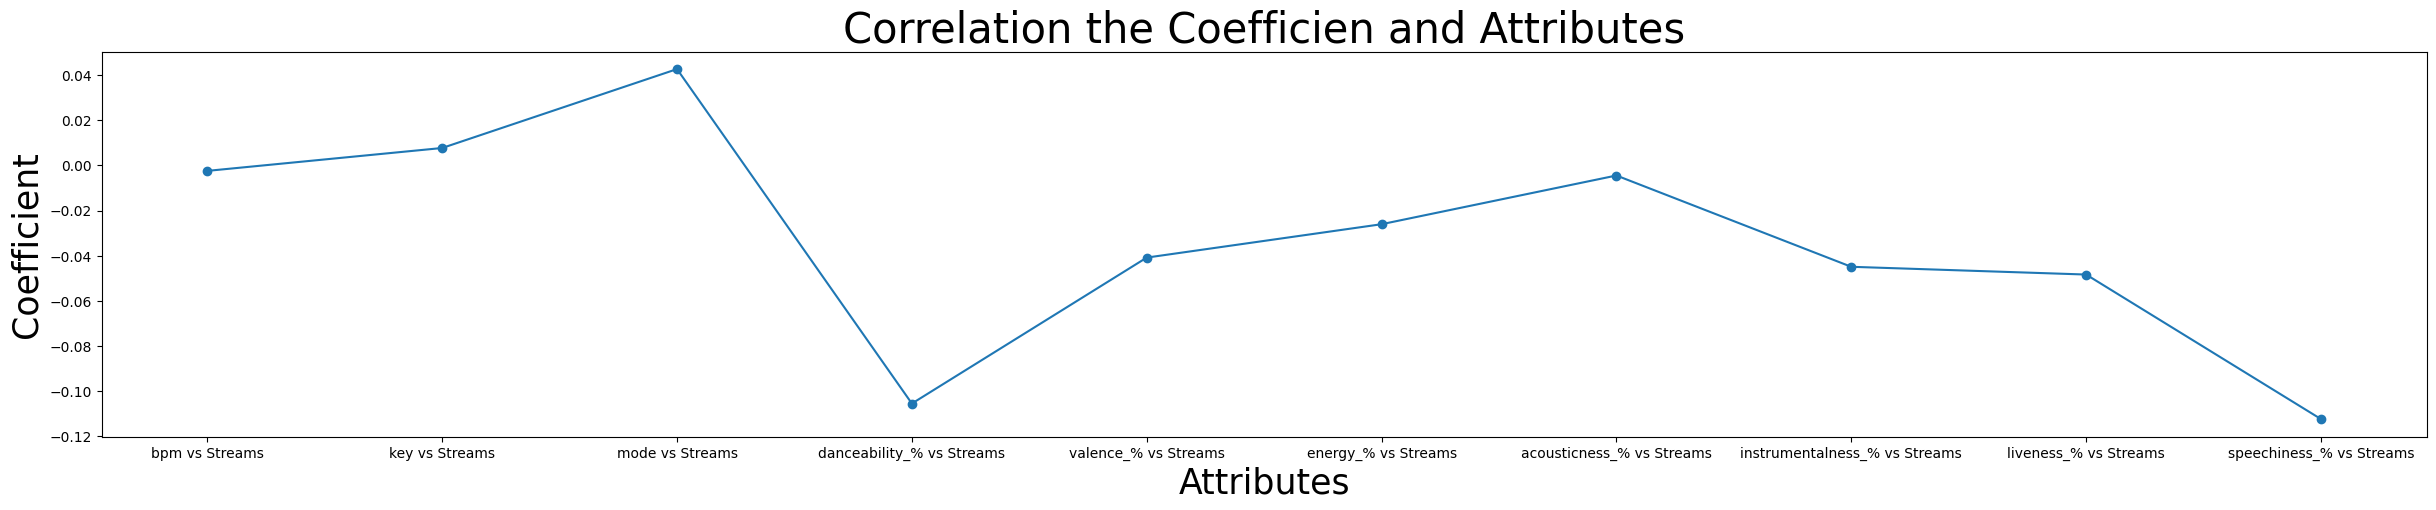

In [267]:
plt.figure(figsize=(30, 5))
plt.plot(cor_d['Attribute'], cor_d['Correlation Coefficient'], marker='o')
plt.xlabel('Attributes', fontsize = 25)
plt.ylabel('Coefficient', fontsize = 25)
plt.title('Correlation the Coefficien and Attributes', fontsize = 30)
plt.show()

#### correlation between Danceability and Energy How about Valence and Acousticness

In [268]:
atib = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']
for attr in atib:
    df[attr] = pd.to_numeric(df[attr], errors='coerce')
    
corr1 = df['danceability_%'].corr(df['energy_%'])
corr2 = df['valence_%'].corr(df['acousticness_%'])
corres = {'Danceability vs Energy': corr1,'Valence vs Acousticness': corr2}
rescor = pd.DataFrame(corres, index=['Correlation Coefficient']).T
rescor

,Correlation Coefficient
Danceability vs Energy,0.198095
Valence vs Acousticness,-0.081907


## Platform Popularity

#### Which platform seems to favor the most popular tracks

In [269]:
count1 = df['in_spotify_playlists'].sum()
count2= df['in_spotify_charts'].sum()
count3= df['in_apple_playlists'].sum()
plat_res = pd.DataFrame({'platform': ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists'], 'track_count': [count1, count2, count3]})
plat_res

,platform,track_count
0,in_spotify_playlists,4955719
1,in_spotify_charts,11445
2,in_apple_playlists,64625


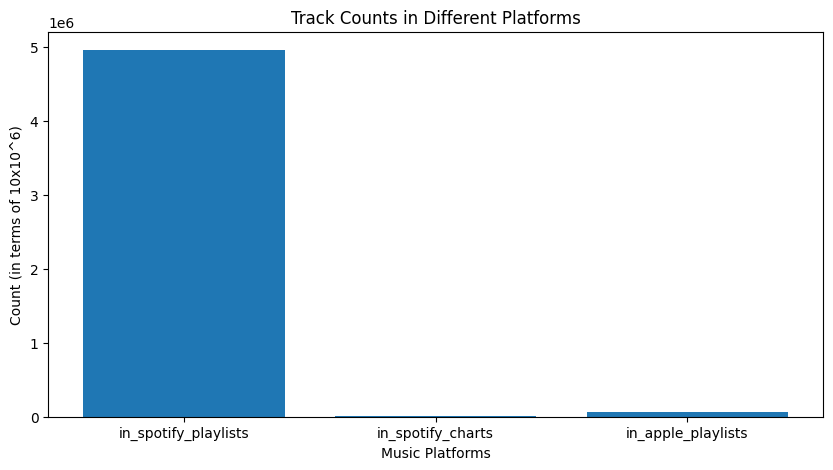

In [291]:
plt.figure(figsize=(10, 5))
plt.bar(plat_res['platform'], plat_res['track_count'])
plt.xlabel('Music Platforms')
plt.ylabel('Count (in terms of 10x10^6)')
plt.title('Track Counts in Different Platforms')
plt.show()

##  Advanced Analysis

#### Major vs. Minor

In [15]:
counts= df.groupby(['key', 'mode']).size().reset_index(name='track_count')
counts


,key,mode,track_count
0,A,Major,42
1,A,Minor,33
2,A#,Major,27
3,A#,Minor,30
4,B,Major,35
5,B,Minor,46
6,C#,Major,73
7,C#,Minor,47
8,D,Major,66
9,D,Minor,15


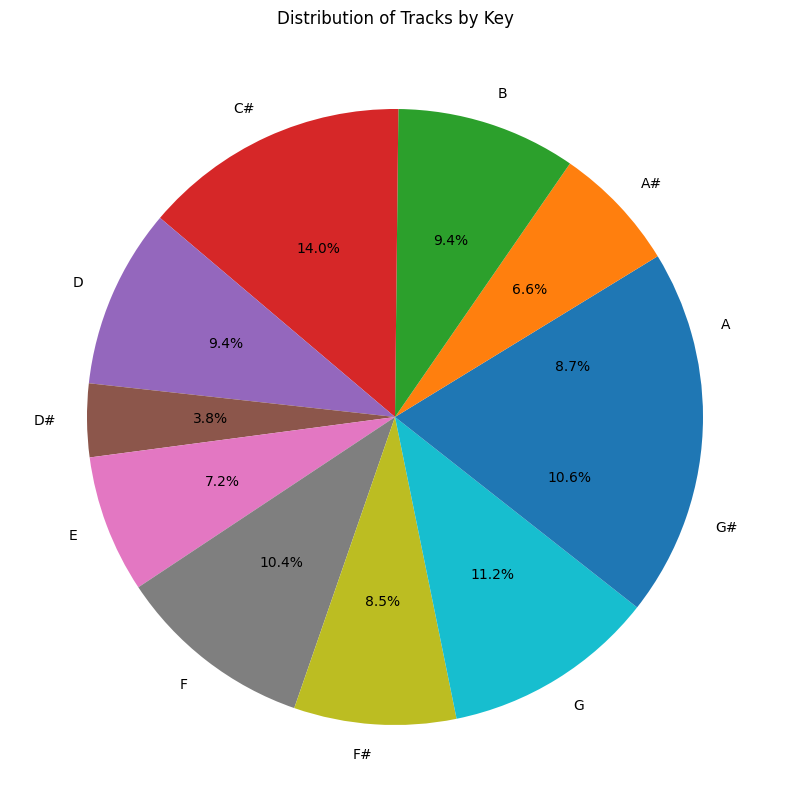

In [19]:

key_counts = counts.groupby('key')['track_count'].sum()
plt.figure(figsize=(10, 10))
plt.pie(key_counts, labels=key_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Tracks by Key')
plt.show()

In [330]:
Mtotal= key_mode_counts.groupby('mode')['track_count'].sum().reset_index()
Mtotal

,mode,track_count
0,Major,475
1,Minor,383


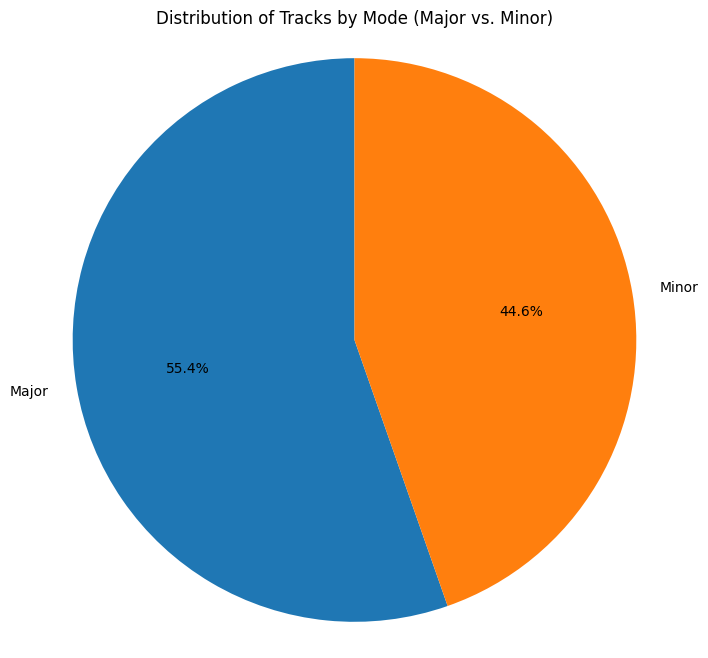

In [334]:
mode_counts = counts.groupby('mode')['track_count'].sum()
plt.figure(figsize=(8, 8))
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tracks by Mode (Major vs. Minor)')
plt.show()

#### Artists consistently appear in more playlists or charts

In [11]:
artist_playlist_counts = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
artist_chart_counts = df.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index()
artist_apple_counts = df.groupby('artist(s)_name')['in_apple_playlists'].sum().reset_index()

artist_counts = (
    artist_playlist_counts.merge(artist_chart_counts, on='artist(s)_name', suffixes=('_playlists', '_charts')).merge(artist_apple_counts, on='artist(s)_name'))
artist_counts.rename(columns={'in_apple_playlists': 'in_apple_playlists'}, inplace=True)
top_artists = artist_counts.sort_values(by='in_spotify_playlists', ascending=False).head(10)
top_artists.reset_index()


,index,artist(s)_name,in_spotify_playlists,in_spotify_charts,in_apple_playlists
0,572,The Weeknd,144053,180,1677
1,558,Taylor Swift,132974,542,1796
2,159,Ed Sheeran,128758,94,1448
3,223,Harry Styles,110026,185,1741
4,171,Eminem,87331,152,475
5,25,Arctic Monkeys,84016,190,241
6,111,Coldplay,75716,72,381
7,33,Avicii,68241,42,407
8,141,"Dr. Dre, Snoop Dogg",65728,0,283
9,7,Adele,65049,69,646


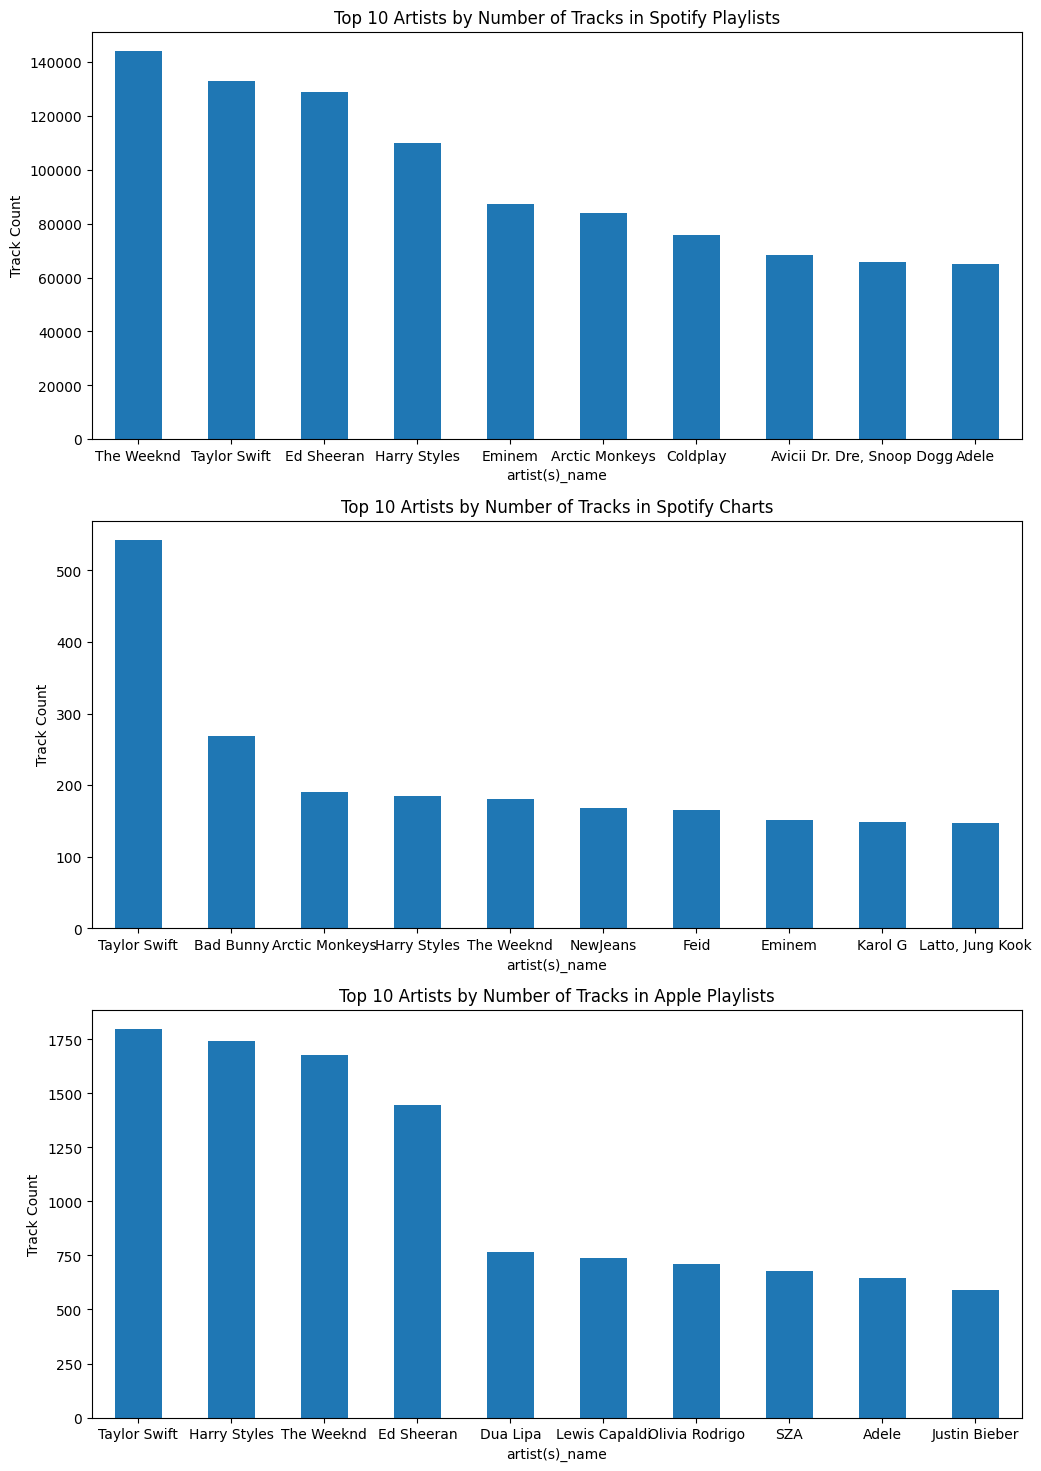

In [20]:
artist_playlist_counts = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
artist_chart_counts = df.groupby('artist(s)_name')['in_spotify_charts'].sum().reset_index()
artist_apple_counts = df.groupby('artist(s)_name')['in_apple_playlists'].sum().reset_index()

artist_counts = (artist_playlist_counts.merge(artist_chart_counts, on='artist(s)_name', suffixes=('_playlists', '_charts')).merge(artist_apple_counts, on='artist(s)_name'))

top_artists_playlists = artist_counts.sort_values(by='in_spotify_playlists', ascending=False).head(10)
top_artists_charts = artist_counts.sort_values(by='in_spotify_charts', ascending=False).head(10)
top_artists_apple = artist_counts.sort_values(by='in_apple_playlists', ascending=False).head(10)

top_artists_playlists.set_index('artist(s)_name', inplace=True)
top_artists_charts.set_index('artist(s)_name', inplace=True)
top_artists_apple.set_index('artist(s)_name', inplace=True)

fig, axs = plt.subplots(3, 1, figsize=(12, 18))
top_artists_playlists['in_spotify_playlists'].plot(kind='bar', ax=axs[0])
axs[0].set_title('Top 10 Artists by Number of Tracks in Spotify Playlists')
axs[0].set_ylabel('Track Count')
axs[0].set_xticklabels(top_artists_playlists.index, rotation=0) 

top_artists_charts['in_spotify_charts'].plot(kind='bar', ax=axs[1])
axs[1].set_title('Top 10 Artists by Number of Tracks in Spotify Charts')
axs[1].set_ylabel('Track Count')
axs[1].set_xticklabels(top_artists_charts.index, rotation=0) 

top_artists_apple['in_apple_playlists'].plot(kind='bar', ax=axs[2])
axs[2].set_title('Top 10 Artists by Number of Tracks in Apple Playlists')
axs[2].set_ylabel('Track Count')
axs[2].set_xticklabels(top_artists_apple.index, rotation=0)  
plt.show()